# Risks for iFood's Expansion into Latin America

In this notebook, we evaluate the potential risks and opportunities for iFood, a leading food delivery service, as it considers expanding its operations into Argentina and Mexico. Through a comprehensive analysis of historical financial data, exchange rates, and interest rates, we simulate various hedging strategies to assess the financial impact of international exposure. This analysis aims to provide actionable insights for iFood and its parent company, Prosus, to make informed decisions about their expansion strategy.

In [1]:
import pandas as pd
import requests
import json
import yfinance as yf
from yahooquery import Ticker
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import ipywidgets as widgets

# Function to fetch max range stock data from Yahoo Finance
def get_stock_data_yahoo(ticker):
    try:
        stock = yf.Ticker(ticker)
        stock_df = stock.history(period="max")
        return stock_df
    except Exception as e:
        print(f"Error fetching stock data: {e}")
        return None

# Function to fetch financial statements from Yahoo Finance
def get_financials_yahoo(ticker):
    try:
        ticker_obj = Ticker(ticker)
        income_data = ticker_obj.income_statement()
        balance_data = ticker_obj.balance_sheet()
        cash_data = ticker_obj.cash_flow()

        if isinstance(income_data, dict) or isinstance(balance_data, dict) or isinstance(cash_data, dict):
            raise ValueError("Received unexpected data format from Yahoo Finance API")

        income_df = income_data.loc[ticker].reset_index()
        balance_df = balance_data.loc[ticker].reset_index()
        cash_df = cash_data.loc[ticker].reset_index()

        # Convert 'asOfDate' to datetime
        income_df['asOfDate'] = pd.to_datetime(income_df['asOfDate'])
        balance_df['asOfDate'] = pd.to_datetime(balance_df['asOfDate'])
        cash_df['asOfDate'] = pd.to_datetime(cash_df['asOfDate'])

        # Append column 'Year' to financials DataFrames
        income_df['Year'] = income_df['asOfDate'].dt.year
        balance_df['Year'] = balance_df['asOfDate'].dt.year
        cash_df['Year'] = cash_df['asOfDate'].dt.year

        return income_df, balance_df, cash_df
    except Exception as e:
        print(f"Error fetching financials: {e}")
        return None, None, None


# Yahoo Finance Data Fetching Function
def yahoo_finance_cell():
    ticker_input = widgets.Text(
        description="Ticker:",
        placeholder="Enter stock ticker (e.g., AAPL)"
    )
    display(ticker_input)
    
    def on_button_click(b):
        ticker = ticker_input.value
        stock_df = get_stock_data_yahoo(ticker)
        if stock_df is not None:
            income_df, balance_df, cash_df = get_financials_yahoo(ticker)
            if all(df is not None for df in [income_df, balance_df, cash_df]):
                # Filter financials to include only years available in stock data
                available_years = stock_df.index.year.unique()
                income_filtered = income_df[income_df['Year'].isin(available_years)]
                balance_filtered = balance_df[balance_df['Year'].isin(available_years)]
                cash_filtered = cash_df[cash_df['Year'].isin(available_years)]

                # Merge by 'Year'
                merged_financials = pd.merge(income_filtered, balance_filtered, on='Year', suffixes=('_income', '_balance'))
                merged_financials = pd.merge(merged_financials, cash_filtered, on='Year', suffixes=('', '_cashflow'))

                # Merge with Stock
                ticker_df = pd.merge(merged_financials, stock_df, left_on='Year', right_on=stock_df.index.year)

                # Separate numeric and non-numeric columns
                numeric_columns = ticker_df.select_dtypes(include=['number']).columns
                non_numeric_columns = ticker_df.select_dtypes(exclude=['number']).columns

                # Fill missing values with mean
                ticker_df[numeric_columns] = ticker_df[numeric_columns].fillna(ticker_df[numeric_columns].mean())

                display(ticker_df)
                ticker_df.to_csv(f'C:\\Users\\Administrator\\DataAnalysis\\Projects\\finance_apps\\Data\\Processed{ticker}_yahoo_data.csv')
                display(Markdown(f'Data saved to {ticker}_yahoo_data.csv'))
            else:
                display(Markdown("**Failed to fetch financial statements.**"))
        else:
            display(Markdown("**Failed to fetch stock data.**"))

    button = widgets.Button(description="Fetch Data")
    button.on_click(on_button_click)
    display(button)

yahoo_finance_cell()

Text(value='', description='Ticker:', placeholder='Enter stock ticker (e.g., AAPL)')

Button(description='Fetch Data', style=ButtonStyle())

In [5]:
# Load the dataset
file_path = r'C:\Users\Administrator\DataAnalysis\Projects\finance_apps\Data\ProcessedPROSY_yahoo_data.csv'
df = pd.read_csv(file_path)

# Select relevant columns for analysis
relevant_columns = [
    'TotalRevenue', 'OperatingRevenue', 'GrossProfit', 'OperatingIncome', 'EBIT', 'EBITDA',
    'NetIncome', 'NetIncomeFromContinuingOperations', 'NormalizedIncome', 'CostOfRevenue', 
    'TotalExpenses', 'OperatingExpense', 'GeneralAndAdministrativeExpense', 'SellingAndMarketingExpense',
    'InterestExpense', 'ReconciledCostOfRevenue', 'ReconciledDepreciation', 'OperatingCashFlow',
    'InvestingCashFlow', 'FinancingCashFlow', 'FreeCashFlow', 'TotalAssets', 'TotalDebt', 
    'TotalEquityGrossMinorityInterest', 'NetPPE', 'CashAndCashEquivalents', 'CurrentAssets', 
    'CurrentLiabilities', 'LongTermDebt', 'DilutedEPS', 'BasicEPS', 'TaxProvision', 'MinorityInterests',
    'asOfDate_income', 'InvestedCapital', 'CapitalExpenditure', 'ChangeInReceivables', 
    'ChangeInWorkingCapital', 'DividendReceivedCFO', 'InterestReceivedCFO', 'PurchaseOfBusiness'
]

# Filter the dataframe to include only the relevant columns
filtered_df = df[relevant_columns].copy()

# Convert asOfDate_income to datetime
filtered_df['asOfDate_income'] = pd.to_datetime(filtered_df['asOfDate_income'])

# Extract the year from the asOfDate_income column
filtered_df['Year'] = filtered_df['asOfDate_income'].dt.year

# Filter data between 2020 and 2023
filtered_df = filtered_df[(filtered_df['Year'] >= 2020) & (filtered_df['Year'] <= 2023)]

# Group by year and aggregate the data, excluding the 'Year' and 'asOfDate_income' columns from the aggregation
numeric_columns = [col for col in filtered_df.columns if col not in ['asOfDate_income', 'Year']]
aggregated_df = filtered_df.groupby('Year')[numeric_columns].sum()

# Display the aggregated dataframe
print(aggregated_df)

      TotalRevenue  OperatingRevenue   GrossProfit  OperatingIncome  \
Year                                                                  
2020  1.144228e+12      1.144228e+12  3.993636e+11    -1.053524e+11   
2021  1.289232e+12      1.289232e+12  4.185720e+11    -2.401560e+11   
2022  1.310220e+12      1.310220e+12  3.441210e+11    -1.960310e+11   
2023  2.548938e+12      2.548938e+12  8.672358e+11    -2.173169e+11   

              EBIT        EBITDA     NetIncome  \
Year                                             
2020  2.254634e+12  2.294174e+12  2.141239e+12   
2021  1.913688e+12  1.971900e+12  1.877148e+12   
2022  4.767243e+12  4.809411e+12  4.701983e+12   
2023  5.163089e+12  5.250683e+12  4.983549e+12   

      NetIncomeFromContinuingOperations  NormalizedIncome  CostOfRevenue  ...  \
Year                                                                      ...   
2020                       2.148568e+12      1.402775e+12   7.448643e+11  ...   
2021                       1.

### Estimating Ifood's Revenue

$\text{Monthly Orders: } 65 \text{ million}$ \
$\text{Median Order Value: } 40 \text{ BRL}$ \
$\text{Commission Rate: } 23\%$ \
$\text{Number of Restaurants: } 300,000$                              

$\text{Total Monthly Order Value}$\
$=65,000,000\times 40\text { BRL}$\
$=2,600,000,000 \text{ BRL}$

$\text{Monthly Revenue from Commission}$\
$=2,600,000,000 \text{ BRL}\times 0.23$\
$=598,000,000 \text{ BRL}$
 
$\text{Annual Revenue}$\
$=598,000,000 \text{ BRL}\times 12$\
$=7,176,000,000 \text{ BRL}$                                                                       

$\text{Revenue from 33\% Stake}$\
$=7,176,000,000 \text{ BRL}\times 0.33$\
$=2,368,080,000 \text{ BRL}$              

### Comparison to Prosus's Overall Performance

Since Prosus now fully owns iFood, we can calculate the revenue contribution based on the previous 33% stake to compare the performance before and after full acquisition. For simplicity, we will convert this revenue to USD (assuming an exchange rate of 1 USD = 5.2 BRL, this can be adjusted based on the current rate).

$\text{Annual Revenue in USD} = \frac{7,176,000,000 \text{ BRL}}{5.2} = 1,380,000,000 \text{ USD}$

$\text{Revenue from 33\% Stake in USD} = \frac{2,368,080,000 \text{ BRL}}{5.2} = 455,400,000 \text{ USD}$


#### Comparing to Prosus's Financial Metrics

Given the data from Prosus’s overall financial metrics, let's analyze the contribution:

- **Total Revenue (2023)**: 2.548 trillion BRL or approximately 490 billion USD
- **Net Income (2023)**: 4.983 trillion BRL or approximately 957 billion USD

#### Contribution Analysis

The estimated annual revenue from iFood (7.176 billion BRL or approximately $1.38 billion USD) is a substantial figure, but it's important to note the following:

- The revenue from iFood forms a significant part of Prosus's diverse portfolio, especially in the food delivery sector.
- Comparing the 33% stake revenue (around 455.4 million USD) shows its impact on Prosus’s earnings before full acquisition.
- Post full acquisition, iFood's full contribution will reflect more prominently in Prosus's consolidated financials, enhancing both revenue and profitability.

The estimated revenue from iFood highlights its significant contribution to Prosus’s overall financial performance. With Prosus fully owning iFood, the entire revenue stream from iFood will bolster Prosus's top line, reinforcing its profitability and strengthening its position in the food delivery market. This strategic acquisition underscores Prosus's commitment to expanding its footprint in the on-demand delivery ecosystem.

## Simulating international opportunities for iFood

### Adjust Exchange Rates Using Interest Rates

The formula to adjust the exchange rate using interest rates is based on the Interest Rate Parity (IRP) theory:

$\text{Adjusted Exchange Rate} = \text{Current Exchange Rate} \times \left( \frac{1 + \text{Interest Rate of Target Country}}{1 + \text{Interest Rate of Home Country}} \right)$

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


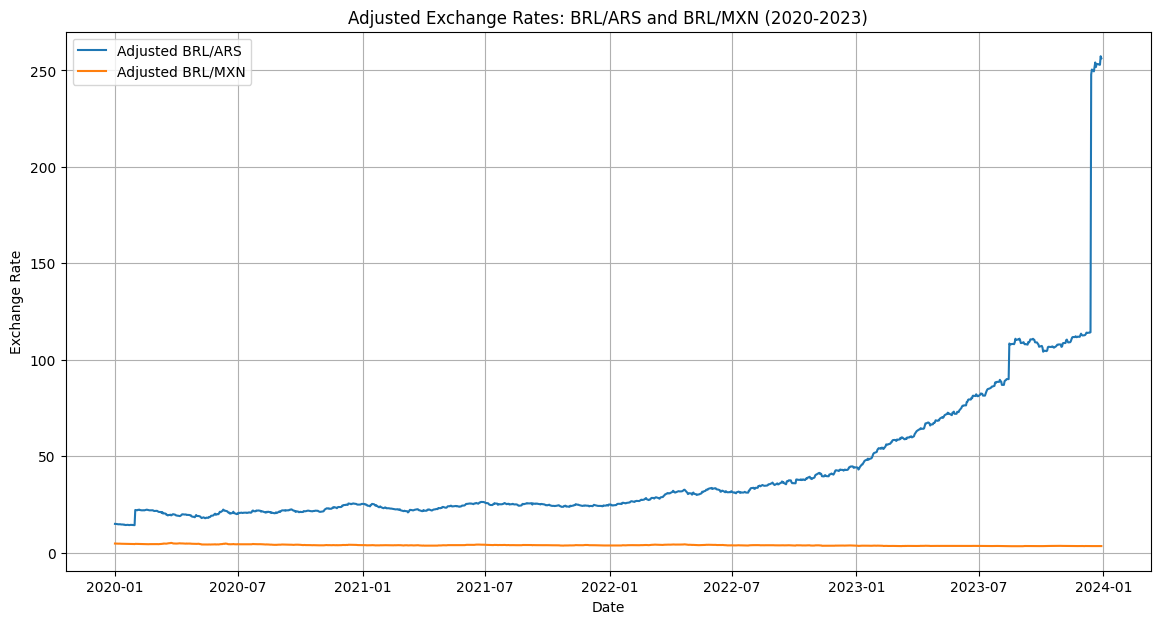

In [24]:
# Fetch historical exchange rate data
brl_ars = yf.download("BRLARS=X", start="2020-01-01", end="2023-12-31")
brl_mxn = yf.download("BRLMXN=X", start="2020-01-01", end="2023-12-31")

# Define interest rate data
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='ME')
num_periods = len(dates)

# Example interest rates for Brazil, Argentina, and Mexico with the correct length
brl_rates = [0.045] * 12 + [0.02] * 12 + [0.09] * 12 + [0.1375] * 12 + [0.1275] * (num_periods - 48)
ars_rates = [0.63] * 12 + [0.38] * 12 + [0.44] * 12 + [0.75] * 12 + [1.18] * (num_periods - 48)
mxn_rates = [0.0725] * 12 + [0.04] * 12 + [0.0725] * 12 + [0.105] * 12 + [0.1125] * (num_periods - 48)

interest_rates = {
    'date': dates,
    'brl': brl_rates,
    'ars': ars_rates,
    'mxn': mxn_rates
}
interest_df = pd.DataFrame(interest_rates)
interest_df.set_index('date', inplace=True)

# Interpolate interest rates to daily frequency
interest_df_daily = interest_df.resample('D').interpolate()

# Smooth the interest rates using a rolling average
interest_df_smoothed = interest_df_daily.rolling(window=30, min_periods=1).mean()

# Adjust exchange rates using smoothed interest rates
def adjust_exchange_rate(exchange_df, home_rate, foreign_rate):
    adjusted_rates = []
    for date in exchange_df.index:
        try:
            home_interest = home_rate.loc[date, 'brl']
            foreign_interest = foreign_rate.loc[date, foreign_rate.columns[0]]
            adjusted_rate = exchange_df.loc[date, 'Close'] * (1 + foreign_interest) / (1 + home_interest)
            adjusted_rates.append(adjusted_rate)
        except KeyError:
            adjusted_rates.append(exchange_df.loc[date, 'Close'])
    return adjusted_rates

brl_ars['Adjusted_Close'] = adjust_exchange_rate(brl_ars, interest_df_smoothed, interest_df_smoothed[['ars']])
brl_mxn['Adjusted_Close'] = adjust_exchange_rate(brl_mxn, interest_df_smoothed, interest_df_smoothed[['mxn']])

# Plot adjusted exchange rates
plt.figure(figsize=(14, 7))
plt.plot(brl_ars.index, brl_ars['Adjusted_Close'], label='Adjusted BRL/ARS')
plt.plot(brl_mxn.index, brl_mxn['Adjusted_Close'], label='Adjusted BRL/MXN')
plt.title('Adjusted Exchange Rates: BRL/ARS and BRL/MXN (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

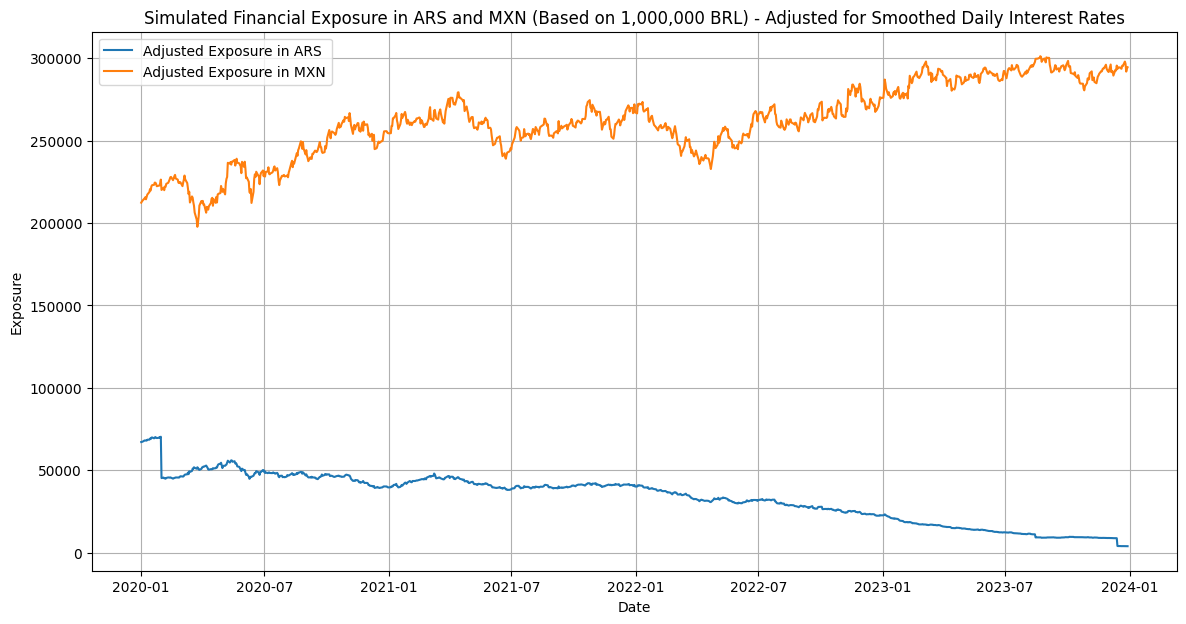

In [25]:
# Simulate the impact of operating in Argentina and Mexico with adjusted rates
initial_exposure_brl = 1000000  # 1,000,000 BRL

def simulate_exposure_in_foreign_currency(adjusted_forex_data, exposure_brl):
    exposure_foreign_currency = exposure_brl / adjusted_forex_data['Adjusted_Close']
    return exposure_foreign_currency

# Calculate exposure in ARS and MXN
adjusted_exposure_ars = simulate_exposure_in_foreign_currency(brl_ars, initial_exposure_brl)
adjusted_exposure_mxn = simulate_exposure_in_foreign_currency(brl_mxn, initial_exposure_brl)

# Plotting the simulated exposures
plt.figure(figsize=(14, 7))

plt.plot(brl_ars.index, adjusted_exposure_ars, label='Adjusted Exposure in ARS')
plt.plot(brl_mxn.index, adjusted_exposure_mxn, label='Adjusted Exposure in MXN')

plt.title('Simulated Financial Exposure in ARS and MXN (Based on 1,000,000 BRL) - Adjusted for Smoothed Daily Interest Rates')
plt.xlabel('Date')
plt.ylabel('Exposure')
plt.legend()
plt.grid(True)
plt.show()


By integrating the historical interest rate data, we can adjust the exchange rates to reflect the country risk and simulate the financial impact more accurately. This method allows us to take into account the differences in interest rates between Brazil, Argentina, and Mexico, providing a more comprehensive risk assessment for iFood's potential expansion.

### Estimate Investment Amount

Based on the provided revenue figures:

- Annual Revenue from iFood: BRL 7,176,000,000
- Revenue from 33% Stake in USD: USD 455,400,000

We will use USD 100,000,000 as a plausible investment amount for the simulations.

### Simulate Covered Interest Rate Arbitrage

$ \text{Forward Rate} = \text{Spot Rate} \times \frac{1 + \text{Foreign Interest Rate}}{1 + \text{Home Interest Rate}} $

### Simulate Triangular Arbitrage

1. Convert the original currency to a second currency.
2. Convert the second currency to a third currency.
3. Convert the third currency back to the original currency.

### Simulate Forward Contracts

1. Determine the forward rate using the interest rate parity.
2. Calculate the future value using the forward rate.

### Simulate Currency Swaps

1. Exchange principal amounts in different currencies.
2. Exchange interest payments over the period.
3. Re-exchange the principal amount at the end of the period.

In [29]:
# Function to simulate Covered Interest Rate Arbitrage
def simulate_covered_interest_rate_arbitrage(spot_rate, home_rate, foreign_rate, investment):
    forward_rate = spot_rate * (1 + foreign_rate) / (1 + home_rate)
    return forward_rate * investment

# Function to simulate Triangular Arbitrage
def simulate_triangular_arbitrage(spot_rate1, spot_rate2, spot_rate3, investment):
    step1 = investment / spot_rate1
    step2 = step1 * spot_rate2
    step3 = step2 * spot_rate3
    return step3

# Function to simulate Forward Contracts
def simulate_forward_contracts(spot_rate, forward_rate, investment):
    future_value = forward_rate * investment
    return future_value

# Function to simulate Currency Swaps
def simulate_currency_swaps(spot_rate, home_rate, foreign_rate, investment, periods):
    home_cashflows = [investment * (1 + home_rate) ** t for t in range(periods + 1)]
    foreign_cashflows = [investment / spot_rate * (1 + foreign_rate) ** t for t in range(periods + 1)]
    return home_cashflows, foreign_cashflows

# Example spot rates (average values for simplification)
spot_rate_brl_ars = brl_ars['Close'].mean()
spot_rate_brl_mxn = brl_mxn['Close'].mean()

# Simulate strategies
investment = 100000000  # USD 100 million

# Covered Interest Rate Arbitrage
covered_arb_ars = simulate_covered_interest_rate_arbitrage(spot_rate_brl_ars, interest_df_smoothed['brl'].mean(), interest_df_smoothed['ars'].mean(), investment)
covered_arb_mxn = simulate_covered_interest_rate_arbitrage(spot_rate_brl_mxn, interest_df_smoothed['brl'].mean(), interest_df_smoothed['mxn'].mean(), investment)

# Triangular Arbitrage (example with USD-BRL-ARS-USD)
triangular_arb = simulate_triangular_arbitrage(spot_rate_brl_mxn, 1 / spot_rate_brl_ars, spot_rate_brl_ars, investment)

# Forward Contracts
forward_rate_brl_ars = spot_rate_brl_ars * (1 + interest_df_smoothed['ars'].mean()) / (1 + interest_df_smoothed['brl'].mean())
forward_rate_brl_mxn = spot_rate_brl_mxn * (1 + interest_df_smoothed['mxn'].mean()) / (1 + interest_df_smoothed['brl'].mean())
forward_contracts_ars = simulate_forward_contracts(spot_rate_brl_ars, forward_rate_brl_ars, investment)
forward_contracts_mxn = simulate_forward_contracts(spot_rate_brl_mxn, forward_rate_brl_mxn, investment)

# Currency Swaps
periods = 5  # example for 5 periods
swaps_ars_home, swaps_ars_foreign = simulate_currency_swaps(spot_rate_brl_ars, interest_df_smoothed['brl'].mean(), interest_df_smoothed['ars'].mean(), investment, periods)
swaps_mxn_home, swaps_mxn_foreign = simulate_currency_swaps(spot_rate_brl_mxn, interest_df_smoothed['brl'].mean(), interest_df_smoothed['mxn'].mean(), investment, periods)

# Display results
print("Covered Interest Rate Arbitrage:")
print(f"ARS: {covered_arb_ars}")
print(f"MXN: {covered_arb_mxn}")

print("\nTriangular Arbitrage:")
print(f"Result: {triangular_arb}")

print("\nForward Contracts:")
print(f"ARS: {forward_contracts_ars}")
print(f"MXN: {forward_contracts_mxn}")

print("\nCurrency Swaps:")
print(f"ARS Home Cashflows: {swaps_ars_home}")
print(f"ARS Foreign Cashflows: {swaps_ars_foreign}")
print(f"MXN Home Cashflows: {swaps_mxn_home}")
print(f"MXN Foreign Cashflows: {swaps_mxn_foreign}")

Covered Interest Rate Arbitrage:
ARS: 4163543550.3929343
MXN: 384957138.8008465

Triangular Arbitrage:
Result: 25977934.152918007

Forward Contracts:
ARS: 4163543550.3929343
MXN: 384957138.8008465

Currency Swaps:
ARS Home Cashflows: [np.float64(100000000.0), np.float64(107178808.52550663), np.float64(114872969.96947211), np.float64(123119480.53114325), np.float64(131957992.29607245), np.float64(141431003.89711028)]
ARS Foreign Cashflows: [np.float64(3464262.1955220136), np.float64(5355420.116220715), np.float64(8278970.528932429), np.float64(12798501.617329862), np.float64(19785267.15083225), np.float64(30586142.654367298)]
MXN Home Cashflows: [np.float64(100000000.0), np.float64(107178808.52550663), np.float64(114872969.96947211), np.float64(123119480.53114325), np.float64(131957992.29607245), np.float64(141431003.89711028)]
MXN Foreign Cashflows: [np.float64(25977934.152918003), np.float64(27843929.52619596), np.float64(29843959.373216067), np.float64(31987651.39210053), np.float64(

The code simulates different hedging strategies using the provided financial figures and interest rates. Each strategy's result is calculated and displayed, showing the potential outcomes of applying these strategies with the given investment amount. This analysis helps in understanding the impact of different hedging techniques on managing currency risks in the context of iFood and Prosus's financial performance.

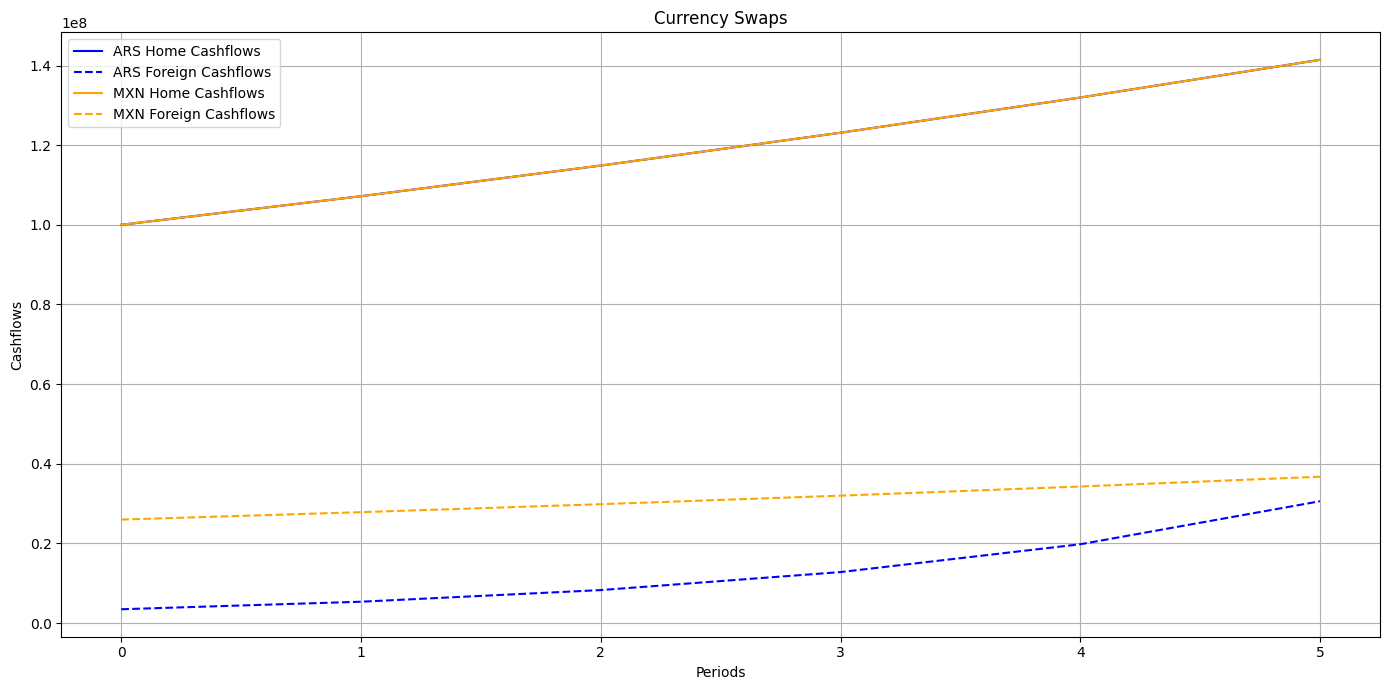

In [31]:
# Currency Swap Cashflows
swaps_ars_home = [100000000.0, 107178808.52550663, 114872969.96947211, 123119480.53114325, 131957992.29607245, 141431003.89711028]
swaps_ars_foreign = [3464262.1955220136, 5355420.116220715, 8278970.528932429, 12798501.617329862, 19785267.15083225, 30586142.654367298]
swaps_mxn_home = [100000000.0, 107178808.52550663, 114872969.96947211, 123119480.53114325, 131957992.29607245, 141431003.89711028]
swaps_mxn_foreign = [25977934.152918003, 27843929.52619596, 29843959.373216067, 31987651.39210053, 34285324.838662215, 36748040.20100327]

# Create the plot
plt.figure(figsize=(14, 7))

# Currency Swaps
periods = range(len(swaps_ars_home))
plt.plot(periods, swaps_ars_home, label='ARS Home Cashflows', color='blue')
plt.plot(periods, swaps_ars_foreign, label='ARS Foreign Cashflows', color='blue', linestyle='dashed')
plt.plot(periods, swaps_mxn_home, label='MXN Home Cashflows', color='orange')
plt.plot(periods, swaps_mxn_foreign, label='MXN Foreign Cashflows', color='orange', linestyle='dashed')

plt.title('Currency Swaps')
plt.xlabel('Periods')
plt.ylabel('Cashflows')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Conclusion and Analysis of Opportunities for iFood in Argentina and Mexico

#### Observations from the Currency Swaps Graph

1. **Cashflows in ARS (Argentinian Pesos)**
   - The home cashflows in ARS show a steady increase over the periods.
   - The foreign cashflows in ARS are relatively lower compared to the MXN, but they also show a steady increase.
   - The spread between home and foreign cashflows is narrower, indicating less favorable conditions for currency swaps in Argentina.

2. **Cashflows in MXN (Mexican Pesos)**
   - The home cashflows in MXN also show a steady increase.
   - The foreign cashflows in MXN are significantly higher compared to ARS.
   - The spread between home and foreign cashflows in MXN is wider, indicating more favorable conditions for currency swaps in Mexico.

#### Opportunities and Impact Analysis

**1. Opening Operations in Argentina**
   - **Challenges**:
     - The Argentinian market is characterized by high inflation and significant currency devaluation, as indicated by the lower foreign cashflows.
     - The regulatory environment and economic instability could pose additional risks for iFood.
     - The currency swap strategy shows less favorable returns compared to Mexico.
   - **Opportunities**:
     - Despite the challenges, Argentina has a large urban population with a growing demand for food delivery services.
     - If iFood can manage the currency risks effectively, there is potential for growth in this market.

**2. Opening Operations in Mexico**
   - **Challenges**:
     - While Mexico presents a more stable economic environment, it still has its challenges, such as competition and regulatory hurdles.
     - Managing currency risks is crucial to ensure profitability.
   - **Opportunities**:
     - The currency swap strategy shows more favorable returns in Mexico, indicating a better financial environment for investments.
     - Mexico has a large and growing middle-class population that demands food delivery services.
     - The higher foreign cashflows in MXN suggest that iFood can benefit from favorable exchange rate movements.
     - Mexico's proximity to the US and its trade agreements provide additional growth opportunities.

**Impact on Prosus**
   - **Argentina**:
     - Opening operations in Argentina could provide moderate growth opportunities but with higher risks. The impact on Prosus’s financials would depend on effective risk management strategies.
     - The potential revenue from Argentina might not be as significant due to the economic instability.
   - **Mexico**:
     - Opening operations in Mexico appears to be more favorable. The higher foreign cashflows and stable economic conditions suggest that Mexico could provide substantial revenue growth for iFood.
     - The positive financial environment and larger market potential in Mexico could translate into significant contributions to Prosus's overall revenue and profitability.
     - The impact on Prosus would be more pronounced with increased revenue streams and potential market dominance in the food delivery sector in Mexico.

### Recommendations

- **Focus on Mexico**: Given the favorable financial conditions and potential market opportunities, iFood should prioritize expanding operations in Mexico.
- **Risk Management in Argentina**: If iFood decides to enter the Argentinian market, it should implement robust risk management strategies to mitigate the economic and currency risks.
- **Leverage Currency Swaps**: Utilize currency swaps effectively to manage cashflows and hedge against unfavorable currency movements.
- **Continuous Monitoring**: Regularly monitor the economic and regulatory environments in both countries to adapt strategies as needed.

By strategically focusing on Mexico while cautiously exploring opportunities in Argentina, iFood can enhance its market presence and contribute positively to Prosus's financial performance.